In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [2]:
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(
#     model="gpt-4o",
#     temperature=0.2
# )

In [3]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = 'deepseek-r1-distill-llama-70b',
    temperature=0.3
)

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000245323B26F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000024532501DF0>, model_name='deepseek-r1-distill-llama-70b', temperature=0.3, model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
llm.invoke("hi!")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 5, 'total_tokens': 21, 'completion_time': 0.087324108, 'prompt_time': 0.000274696, 'queue_time': 0.053535435, 'total_time': 0.087598804}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--12134f60-1a42-4d4f-9f77-6f42757e83c1-0', usage_metadata={'input_tokens': 5, 'output_tokens': 16, 'total_tokens': 21})

In [5]:
# %pip install langchain-experimental

In [6]:
from langchain_experimental.utilities import PythonREPL
from langchain_tavily import TavilySearch

In [7]:
search_tool = TavilySearch()

In [8]:
search_tool.invoke("what's going on in paris?")

{'query': "what's going on in paris?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://parisjetaime.com/eng/article/current-events-in-paris-a1696',
   'title': 'Current events in Paris - exhibitions - shows - festivals',
   'content': "Check out the events calendar to find out what's happening now in Paris! Paris has a year-round programme of exciting and eclectic events.",
   'score': 0.7449724,
   'raw_content': None},
  {'url': 'https://www.the-independent.com/topic/paris',
   'title': 'Paris - latest news, breaking stories and comment - The Independent',
   'content': "Paris Syria's interim leader al-Sharaa makes first trip to Europe with Paris visit France accuses a Russia-linked hacking group of targeting the Paris Olympics and French agencies Arsenal can ‘do something special’ in return leg in Paris Kim Kardashian Paris trial: ‘Grandpa gang’ accused of robbery in court Kim Kardashian Paris trial: ‘Grandpa gang’ accused of robbery in co

In [9]:
repl = PythonREPL()

In [10]:
code = """
x = 5
y = x * 2
print(y)
"""

In [11]:
repl.run(code)

Python REPL can execute arbitrary code. Use with caution.


'10\n'

In [12]:
from typing import Annotated
from langchain_core.tools import tool

In [13]:
@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )

<>:13: SyntaxWarning: invalid escape sequence '\`'
<>:13: SyntaxWarning: invalid escape sequence '\`'
<>:13: SyntaxWarning: invalid escape sequence '\`'
<>:13: SyntaxWarning: invalid escape sequence '\`'
C:\Users\Bapan Bairagya\AppData\Local\Temp\ipykernel_7712\2173611335.py:13: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
C:\Users\Bapan Bairagya\AppData\Local\Temp\ipykernel_7712\2173611335.py:13: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [14]:
python_repl_tool

StructuredTool(name='python_repl_tool', description='Use this to execute python code. If you want to see the output of a value,\n    you should print it out with `print(...)`. This is visible to the user.', args_schema=<class 'langchain_core.utils.pydantic.python_repl_tool'>, func=<function python_repl_tool at 0x00000245310460C0>)

In [15]:
print(python_repl_tool.invoke(code))

Successfully executed:
\`\`\`python

x = 5
y = x * 2
print(y)

\`\`\`
Stdout: 10


If you have completed all tasks, respond with FINAL ANSWER.


In [16]:
def make_system_prompt(instruction:str) -> str:
    return  (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{instruction}"
    )

In [17]:
make_system_prompt("You can only do research. You are working with a chart generator colleague.")

"You are a helpful AI assistant, collaborating with other assistants. Use the provided tools to progress towards answering the question. If you are unable to fully answer, that's OK, another assistant with different tools  will help where you left off. Execute what you can to make progress. If you or any of the other assistants have the final answer or deliverable, prefix your response with FINAL ANSWER so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."

In [18]:
from langchain_core.messages import BaseMessage, HumanMessage
from typing_extensions import Literal
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.types import Command
from langgraph.prebuilt import create_react_agent

In [19]:
def get_next_node(last_message:BaseMessage, goto:str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    
    return goto

In [20]:
#agent1

def research_node(state: MessagesState) -> Command[Literal["chart_generator", "__end__"]]:
    research_agent = create_react_agent(
        llm,
        tools=[search_tool],
        prompt=make_system_prompt(
            "You can only do research. You are working with a chart generator colleague."
        )
    )

    # Get the result from the agent
    result = research_agent.invoke(state)  # result is expected to be a dict with "messages"

    # Extract messages from result
    messages = result["messages"]

    # Ensure we set the last message's name to "researcher"
    messages[-1] = HumanMessage(content=messages[-1].content, name="researcher")

    # Decide where to go next
    goto = get_next_node(messages[-1], "chart_generator")

    return Command(update={"messages": messages}, goto=goto)

In [21]:
# agent2

def chart_node(state:MessagesState)-> Command[Literal["researcher", "__end__"]]:
    chart_agent=create_react_agent(
        llm,
        tools=[python_repl_tool],
        prompt=make_system_prompt(
        "You can only generate charts. You are working with a researcher colleague."
    ),
        )
    result=chart_agent.invoke(state)
    goto=get_next_node(result["messages"][-1],"researcher")
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="chart_generator")
    return Command(update={"messages": result["messages"]},goto=goto)

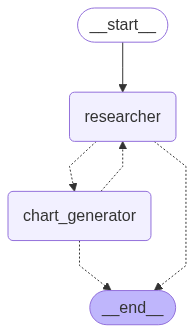

In [22]:
workflow = StateGraph(MessagesState)
workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

workflow.add_edge(START, "researcher")
app = workflow.compile()
app

Testing the multi-agent system...
================================ Human Message =================================

get the UK's GDP over the past 3 years, then make a line chart of it.Once you make the chart, finish.
================================ Human Message =================================
Name: researcher

To create a line chart of the UK's GDP growth rates from 2021 to 2023, we'll use the following data points:

- **2021**: 7.5%
- **2022**: 4.1%
- **2023**: 1.4%

Here's how the line chart would look:

```
Line Chart: UK GDP Growth Rate (2021-2023)

Years | GDP Growth Rate (%)
-----|---------------------
2021 | 7.5
2022 | 4.1
2023 | 1.4

```

This chart visually represents the decline in GDP growth rates over the three years, reflecting the economic challenges faced by the UK during this period.


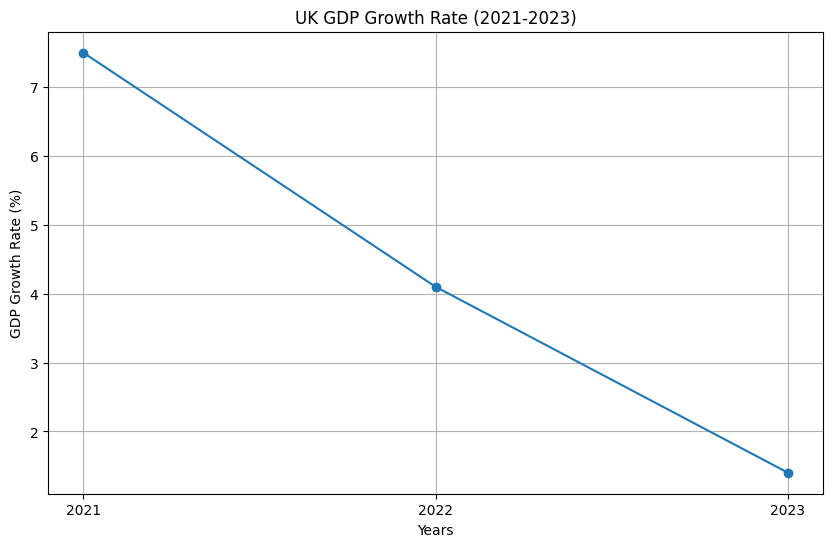

================================ Human Message =================================
Name: chart_generator

FINAL ANSWER: Here is the line chart showing the UK's GDP growth rates from 2021 to 2023:

```
Line Chart: UK GDP Growth Rate (2021-2023)

Years | GDP Growth Rate (%)
-----|---------------------
2021 | 7.5
2022 | 4.1
2023 | 1.4
```

This chart visualizes the decline in GDP growth rates over the three years, reflecting the economic challenges faced by the UK during this period.


In [24]:
# Test the system
print("Testing the multi-agent system...")
print("=" * 50)

events = app.stream(
    {
        "messages": [("user","get the UK's GDP over the past 3 years, then make a line chart of it.Once you make the chart, finish.")]
    },
    stream_mode="values"
)

for event in events:
    event["messages"][-1].pretty_print()